# A1 - Supplements

Supplementary tests and runs with graphical outputs for all 10 MRA scans

In [1]:

import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import MRASegmentation as mra



/Users/rvh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


No MRA scans are available and nothing can be processed. Set up source data in directory data/source/


Test with the single MRA scan MNI-0663. This record is manually segmented. 

Load the MRA Segmentation app

In [2]:
app = mra.MRASegmentation()
mra_all = app.get_mra_source_ids()

Load the test data that is used for the evaluation of the model

In [3]:
l_src_map = np.ndarray(shape=(len(mra_all),app._no_slices,app._img_height,app._img_height), dtype=int)  
l_seg_map = np.ndarray(shape=(len(mra_all),app._no_slices,app._img_height,app._img_height), dtype=int)  
l_gt_map  = np.ndarray(shape=(len(mra_all),app._no_slices,app._img_height,app._img_height), dtype=int)  
i=0
for mra_id in mra_all: 
    app._mra_id = mra_id
    # Read in 3D MRA source data 
    l_src_map[i] = (app.get_3d_mra_source(mra_id) > 240).astype(int)
    l_seg_map[i] = (app.get_3d_mra_output(mra_id) > 240).astype(int)
    l_gt_map[i]  = np.sign(app.get_3d_mra_gt(mra_id)).astype(int)
    print('MRA Scan '+mra_id+' read in successfully.') 
    i = i+1
    

MRA Scan MNI_0656 read in successfully.
MRA Scan MNI_0657 read in successfully.
MRA Scan MNI_0592 read in successfully.
MRA Scan MNI_0643 read in successfully.
MRA Scan MNI_0663 read in successfully.
MRA Scan MNI_0664 read in successfully.
MRA Scan MNI_0590 read in successfully.
MRA Scan MNI_0591 read in successfully.
MRA Scan MNI_0640 read in successfully.
MRA Scan MNI_0648 read in successfully.


Visualise Ground Truth

In [71]:
idx = 3 # set the index of the record that should be visualised 
l_src = l_src_map[idx]
l_seg = l_seg_map[idx]
l_gt  = l_gt_map[idx]
print(mra_all[idx])

MNI_0643


In [72]:
from mpl_toolkits.mplot3d import Axes3D

def display_3d_image (fig, ax, data_points, cols):
    i = 0
    for dp in data_points.keys():
        ax.scatter(data_points[dp][2], data_points[dp][1], data_points[dp][0], c=cols[i], marker='o',s=0.5)
        i = i + 1

    plt.xlim(0, len(l_seg[1,1,:]))
    plt.ylim(0, len(l_seg[1,:,1]))
    ax.set_xlabel('Image Slices')
    ax.set_ylabel('X Pixel')
    ax.set_zlabel('Y Pixel')


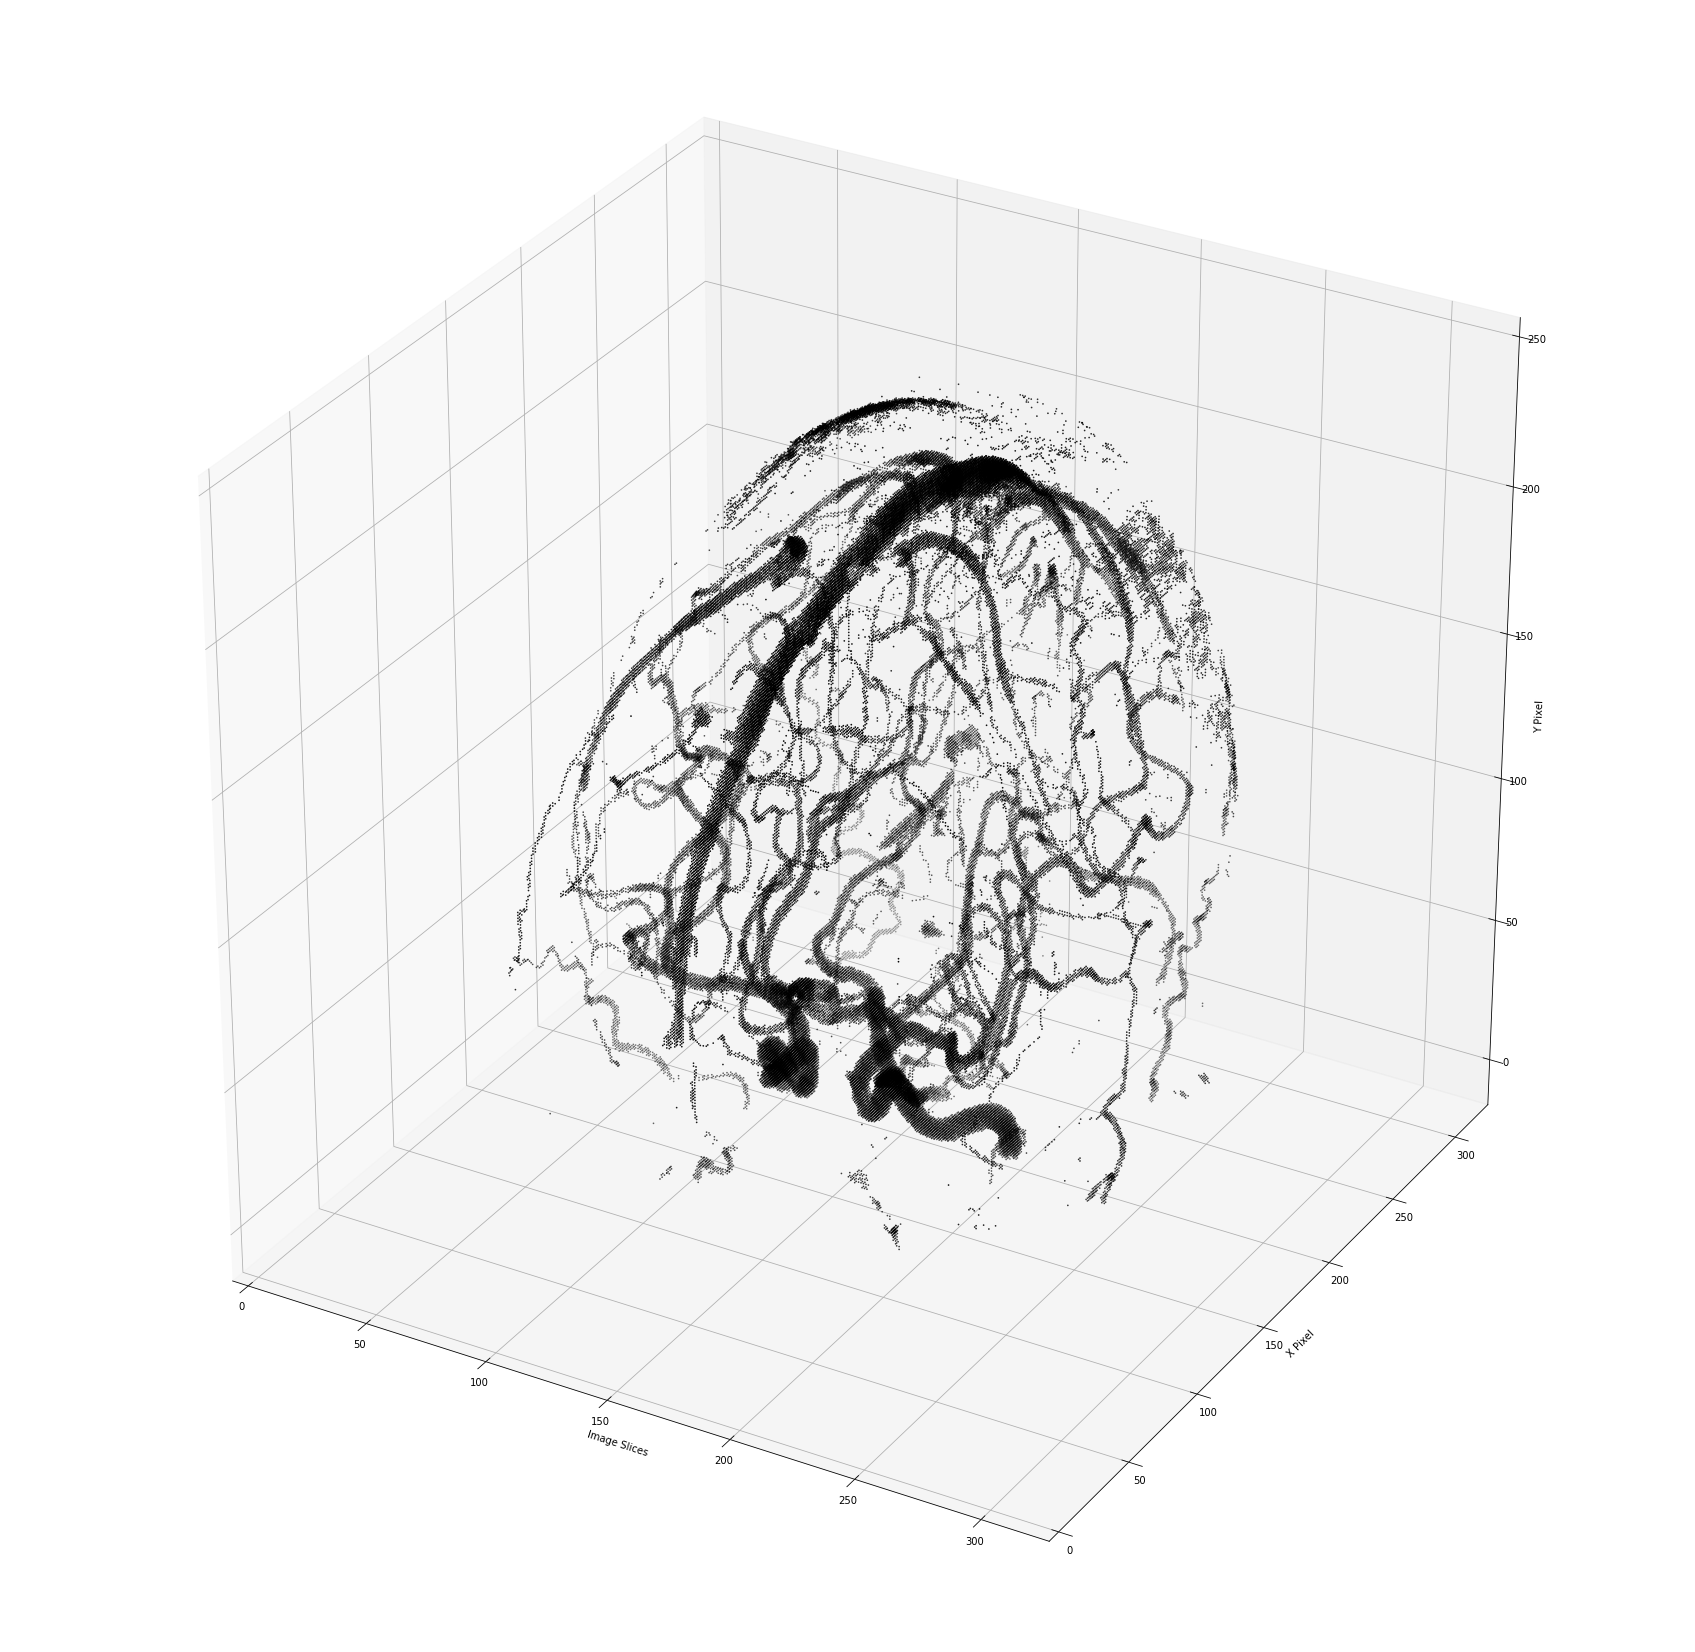

In [73]:
ll = dict()
i = np.equal(l_src, 1)
ll[0] = np.where(i)
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111, projection='3d')
display_3d_image (fig, ax, ll, ['black'])
plt.show()

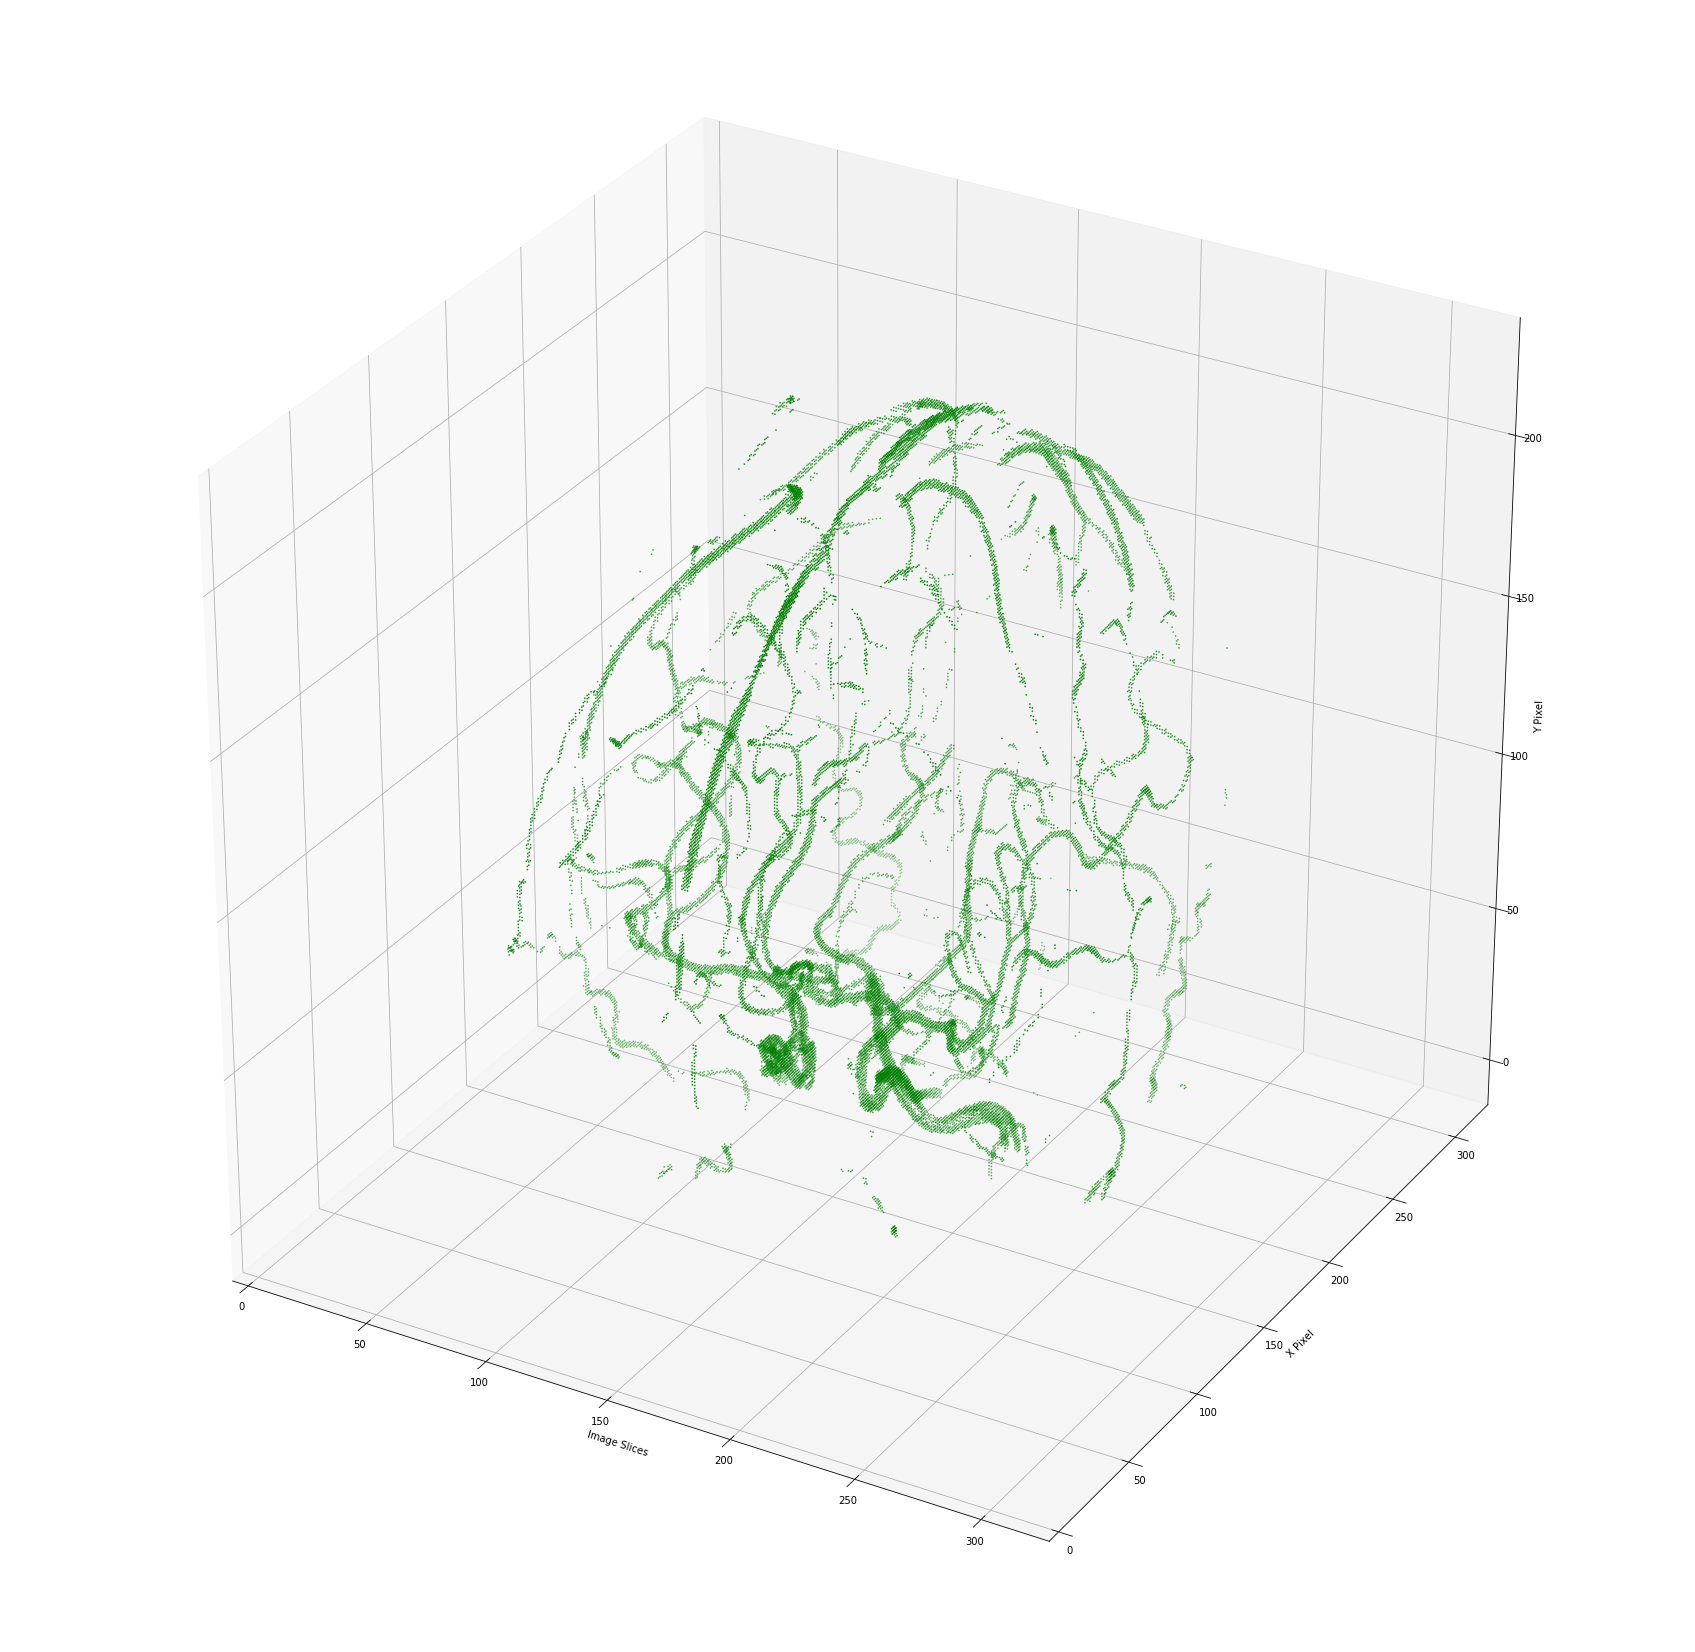

In [74]:
ll = dict()
i = np.equal(l_gt, 1)
ll[0] = np.where(i)

fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111, projection='3d')
display_3d_image (fig, ax, ll, ['green'])
plt.show()

Visualise Segmented Image

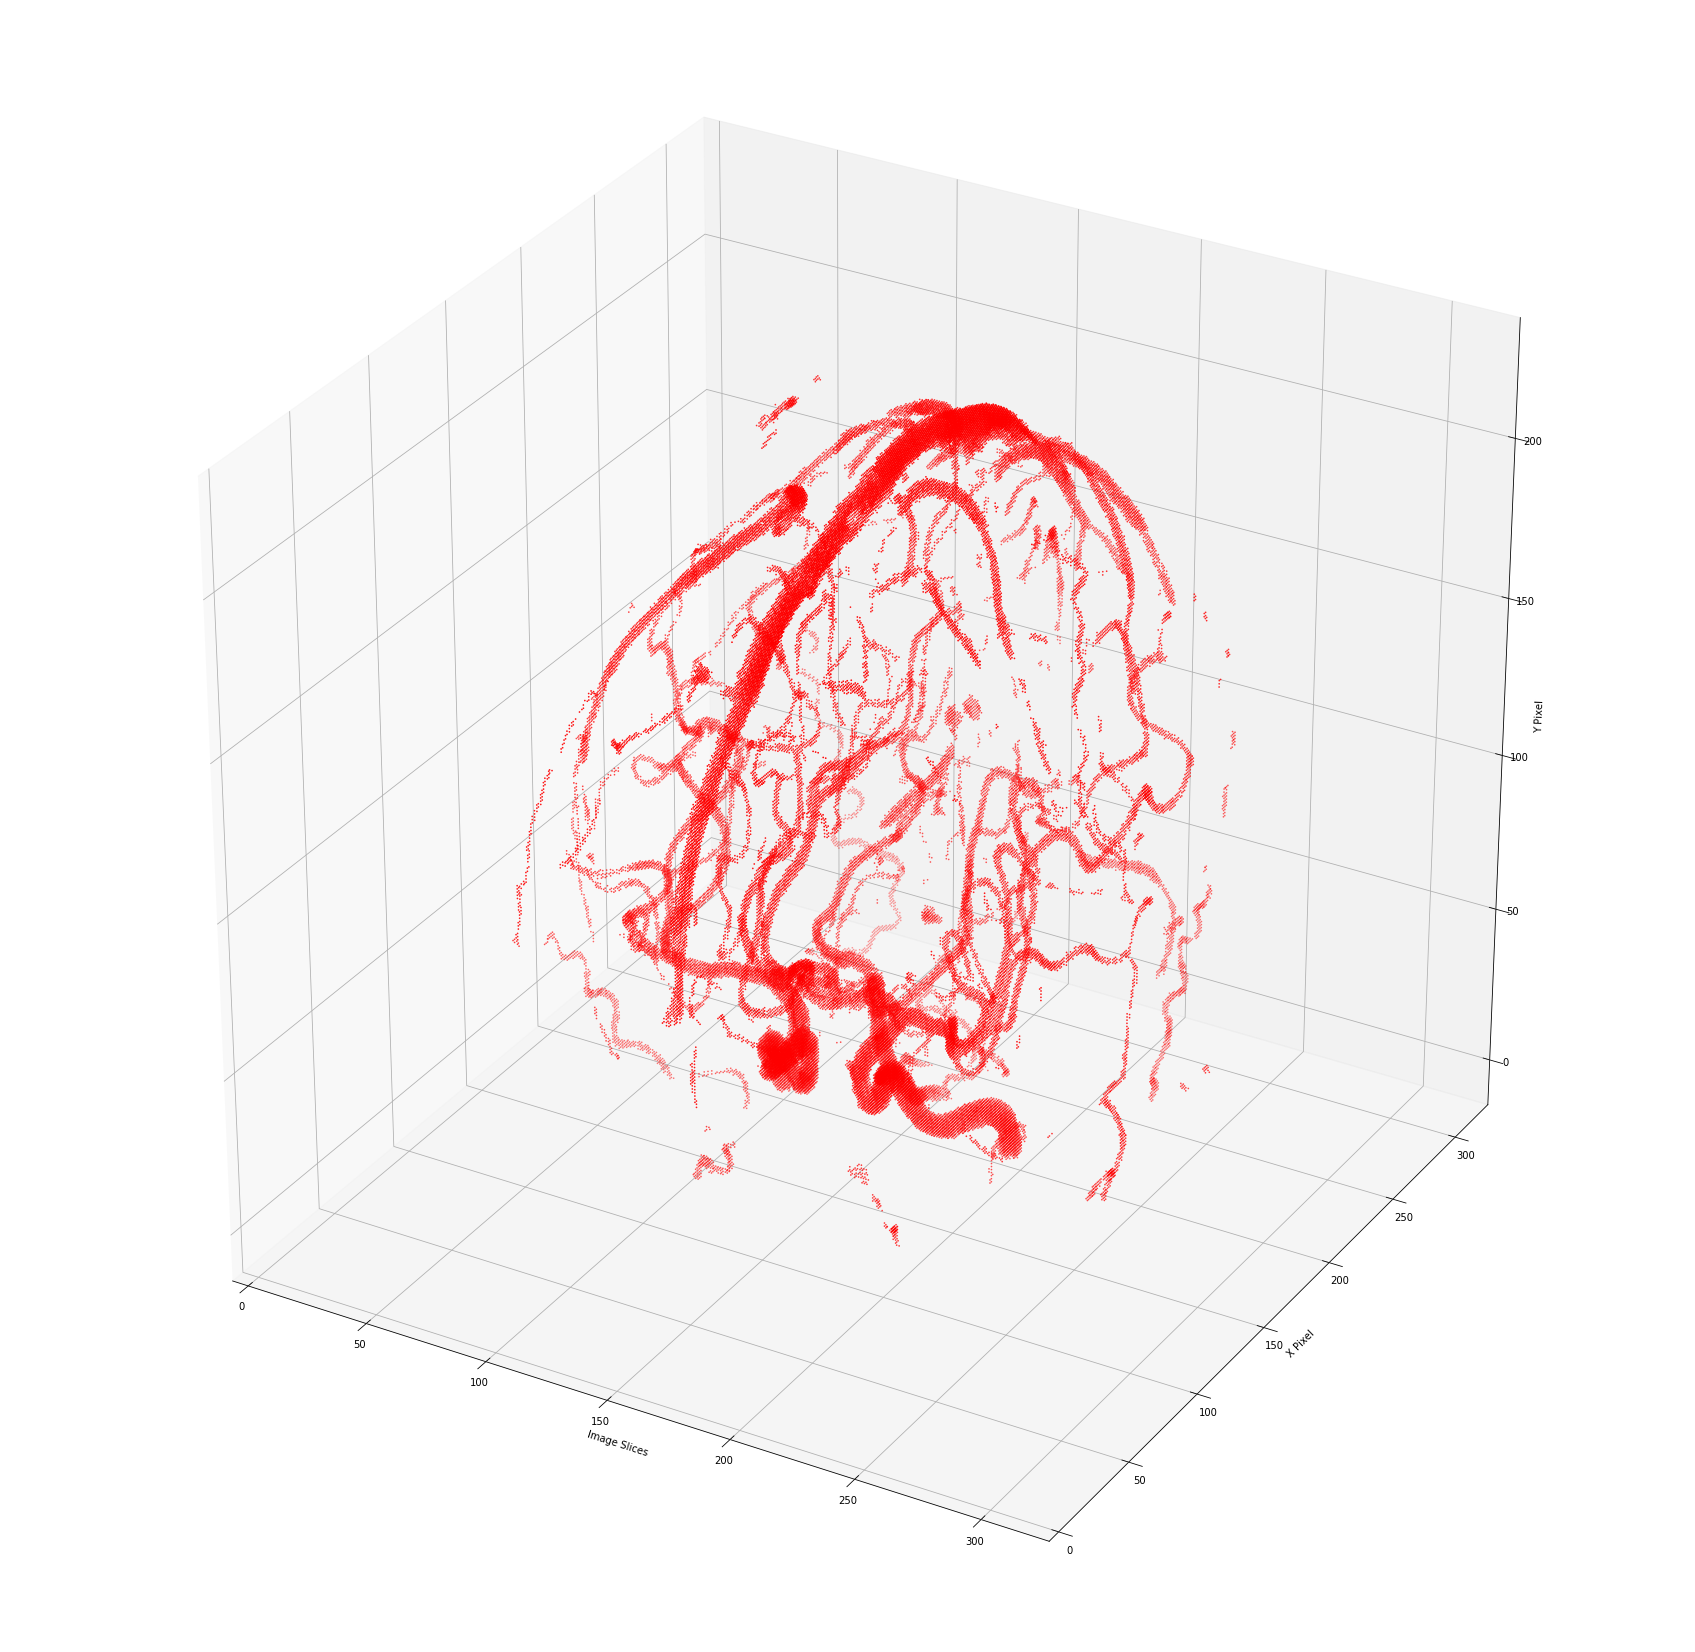

In [75]:

b_map = l_seg.astype(int)

ll = dict()
i = np.equal(b_map, 1)
ll[0] = np.where(i)

fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111, projection='3d')
display_3d_image (fig, ax, ll, ['red'])
plt.show()

In the final step we create an overlay between ground truth (green) and predicted segmentation map (red). Matching areas are highlighted in yellow, green are GT only sections, and red are predicted sections that are missing in the GT.

FN - Green  - (Blood vessel missed):                  1085
TP - Yellow - (Correctly classified as blood vessel): 24649
FP - Red    - (Wrongly classified as blood vessel):   42733
TN - Opaque - (Correctly classified as background):   25224333
***************************************************************
Total pixel number:                                   25292800
    
Precision:   36.58%
Recall:      95.78%
F1 Score:    52.94%
    


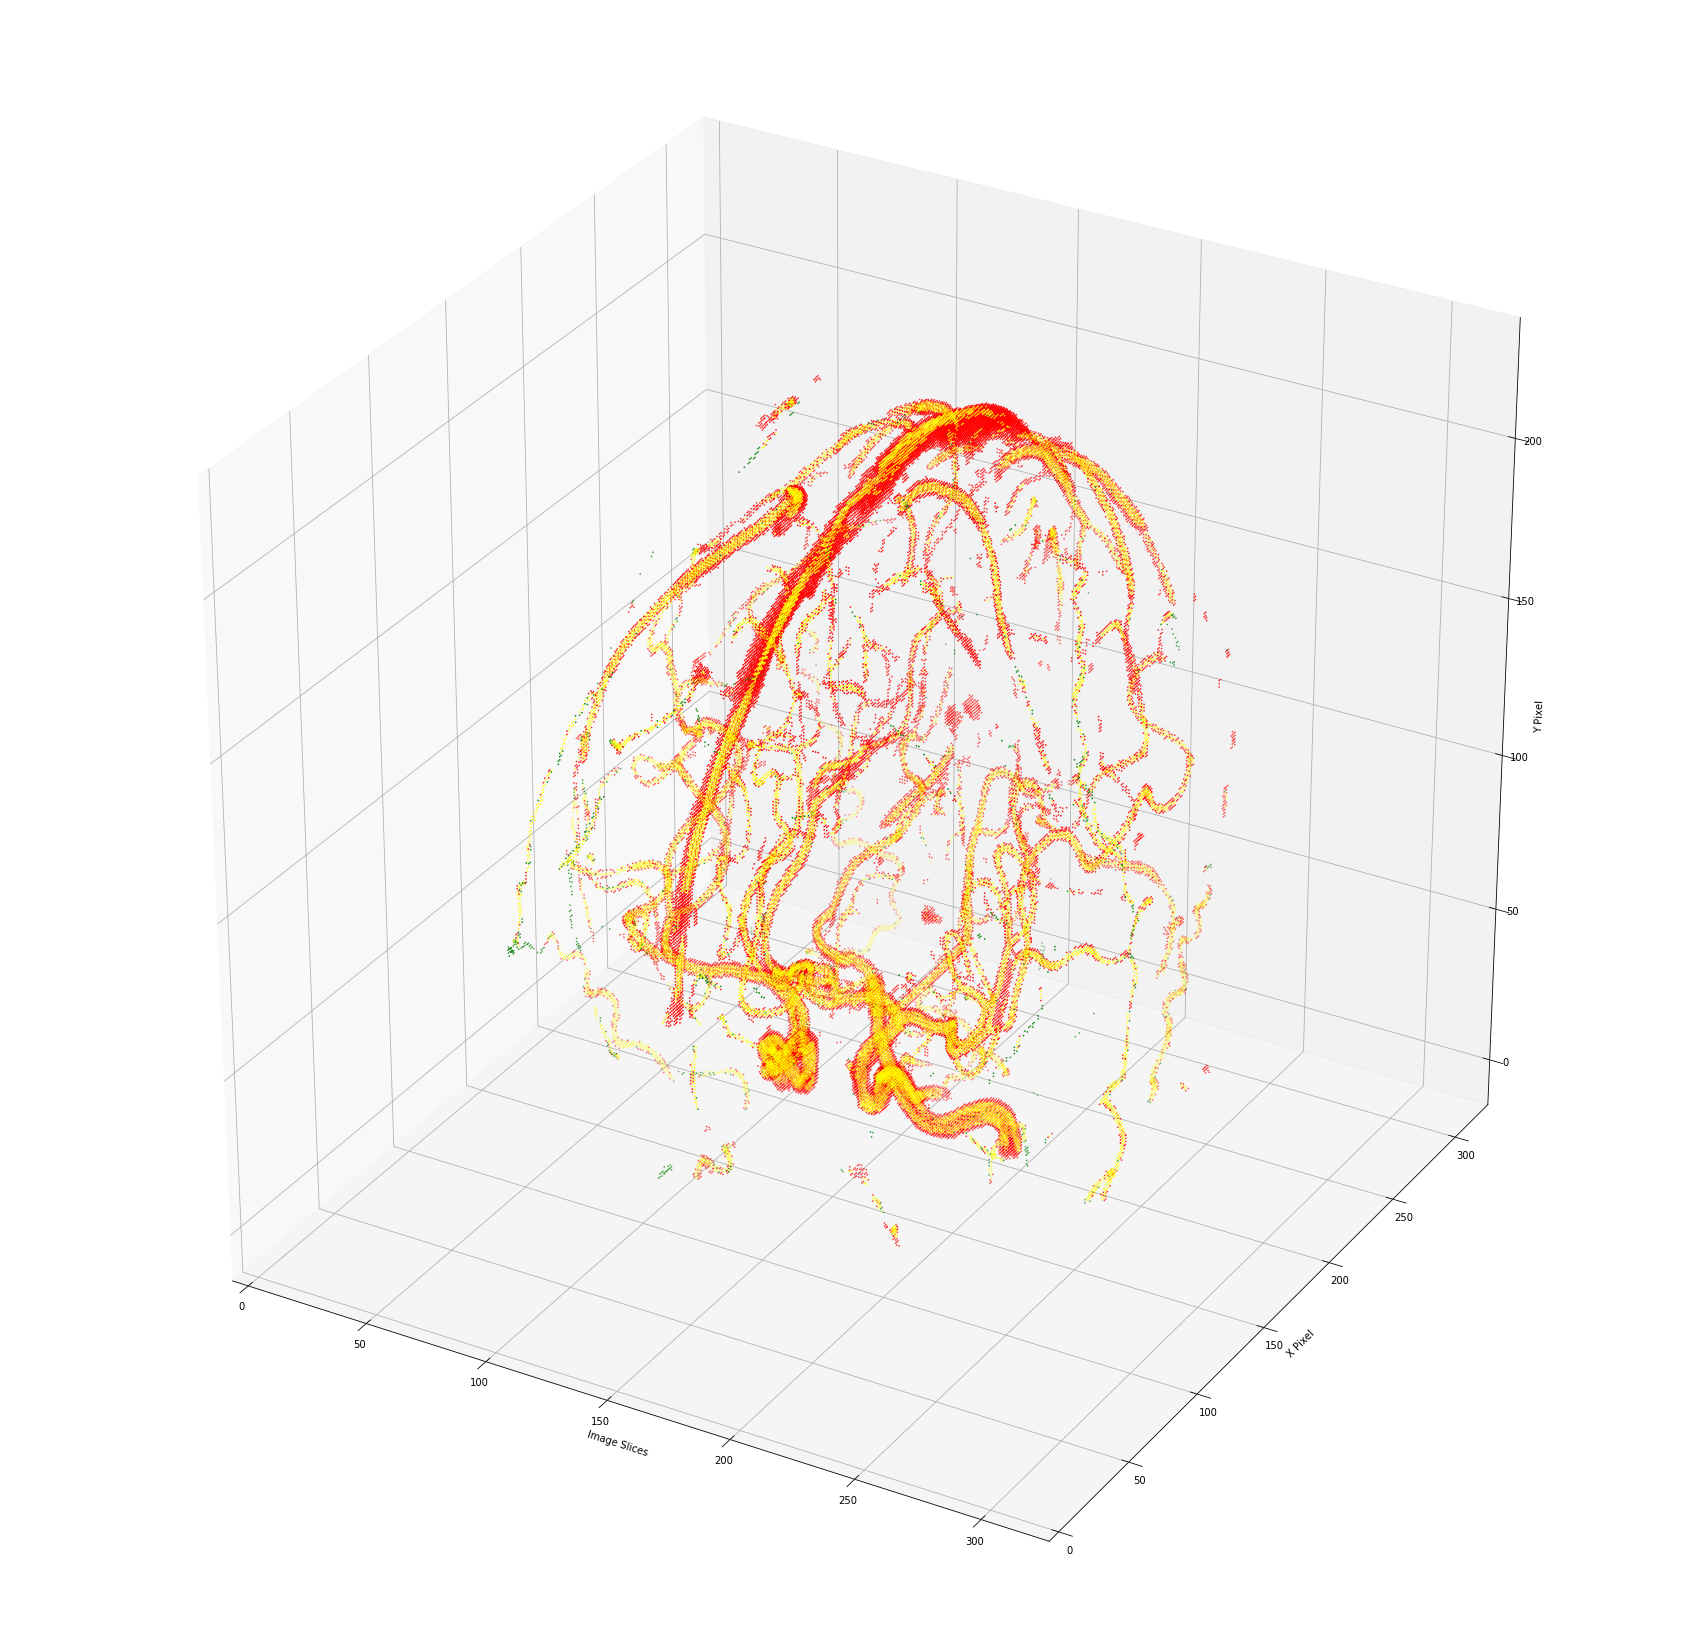

In [76]:

diff = l_gt - (b_map *2)

fn = (diff== 1).sum()
tp = (diff==-1).sum()
fp = (diff==-2).sum()
tn = (diff== 0).sum()
p  = tp / (tp + fp)  # precision 
r  = tp / (tp + fn)  # recall 
f1 = 2*p*r/(p+r)     # F1 score
print('FN - Green  - (Blood vessel missed):                  ' + str(fn) )
print('TP - Yellow - (Correctly classified as blood vessel): ' + str(tp) )
print('FP - Red    - (Wrongly classified as blood vessel):   ' + str(fp) )
print('TN - Opaque - (Correctly classified as background):   ' + str(tn) )
print('***************************************************************')
print('Total pixel number:                                   ' + str(fn+tp+fp+tn))
print('    ')
print('Precision:   ' + str(np.round(100*p,2))+'%')
print('Recall:      ' + str(np.round(100*r,2))+'%')
print('F1 Score:    ' + str(np.round(100*f1,2))+'%')
print('    ')

ll = dict()
idx = np.equal(diff, 1) # missed blood vessels
ll[0] = np.where(idx)

idx = np.equal(diff, -2) # wrongly assigned blood vessels
ll[1] = np.where(idx)


idx = np.equal(diff, -1) # correctly assigned blood vessels
ll[2] = np.where(idx)

fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111, projection='3d')
display_3d_image (fig, ax, ll, ['green','red','yellow'])
plt.show()

Comparing the results across all 10 MRA scans

MRA Scan MNI_0656


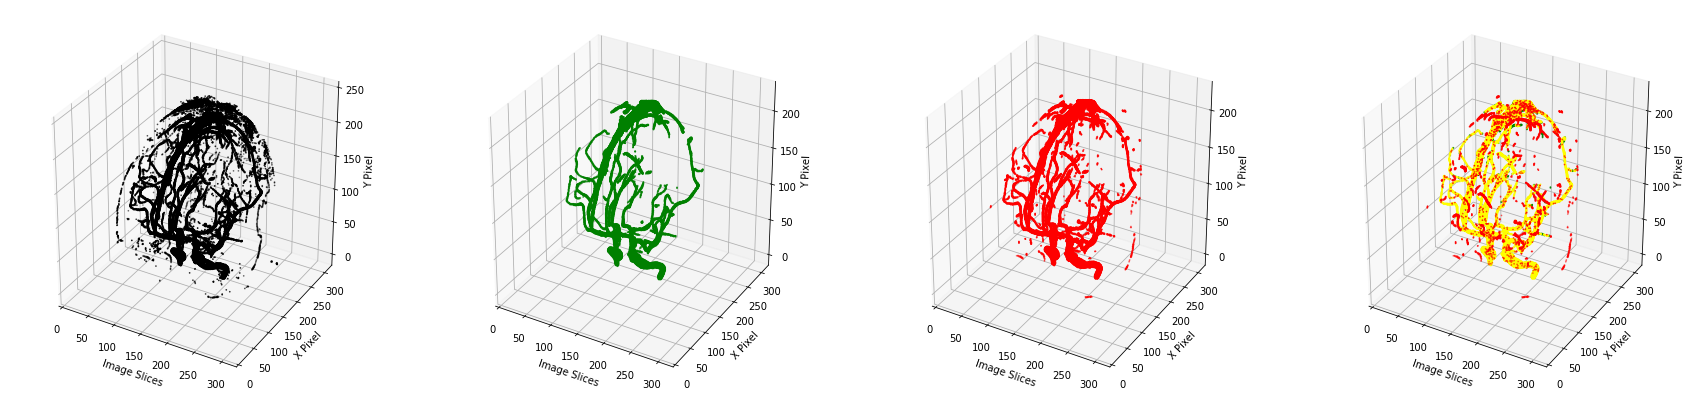

MRA Scan MNI_0657


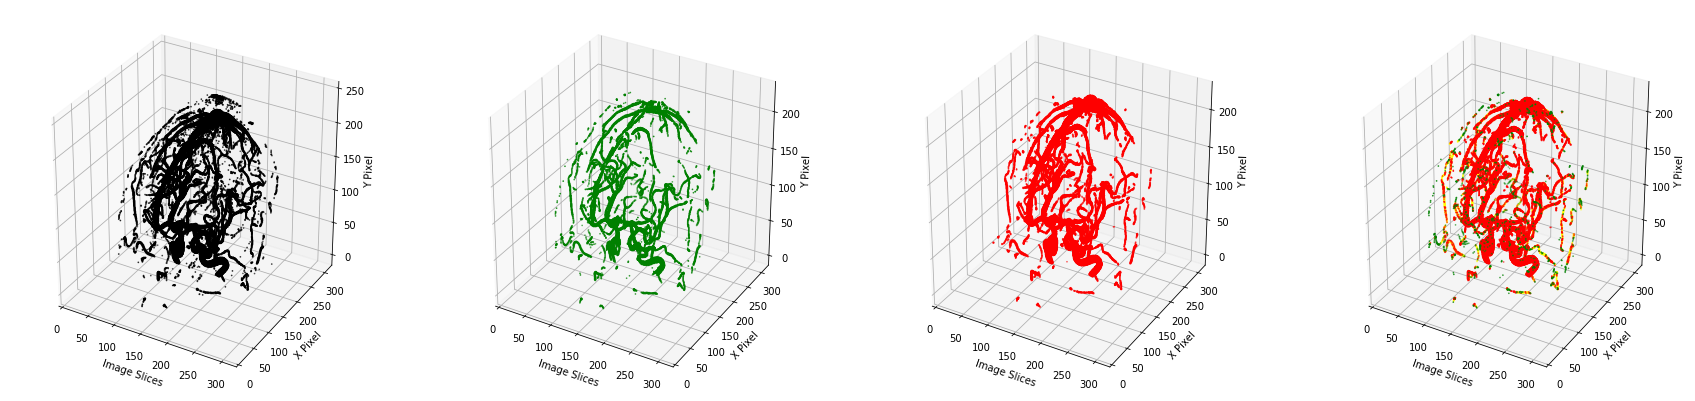

MRA Scan MNI_0592


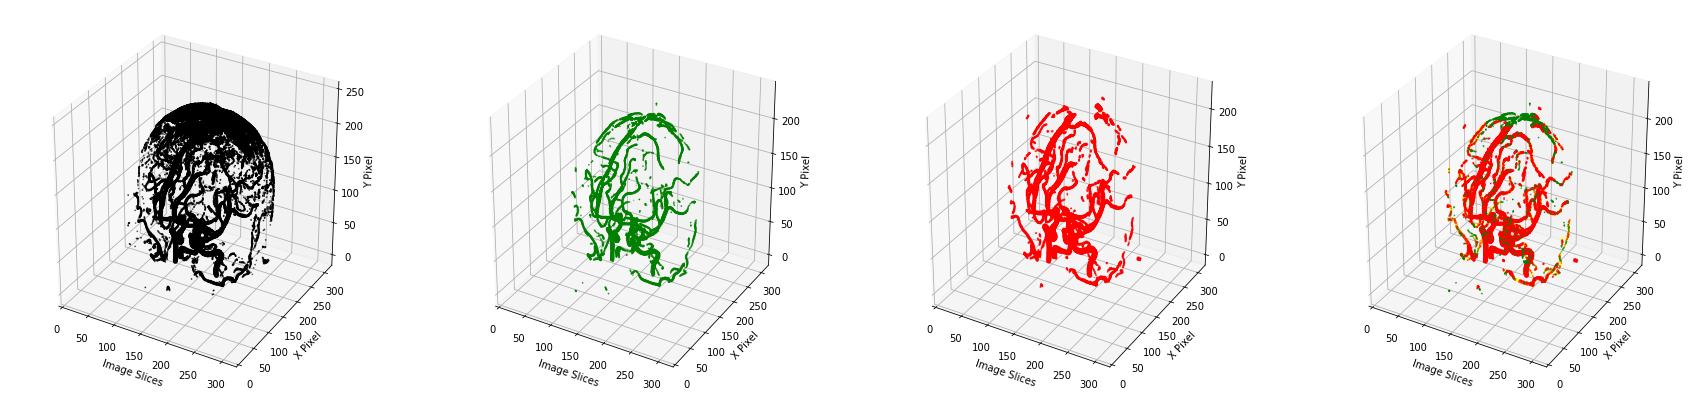

MRA Scan MNI_0643


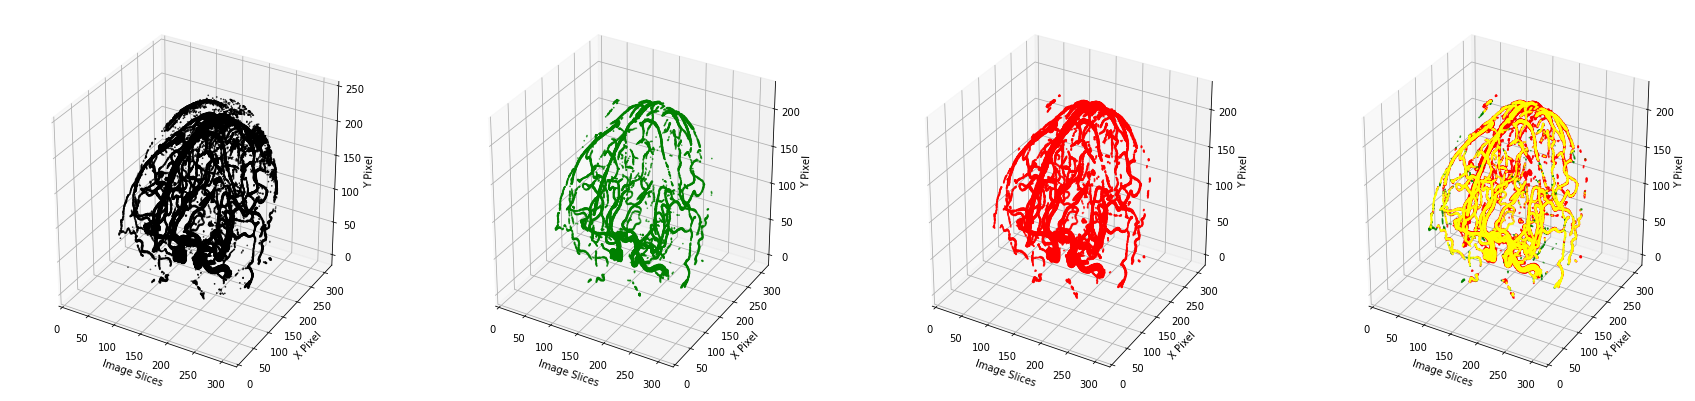

MRA Scan MNI_0663


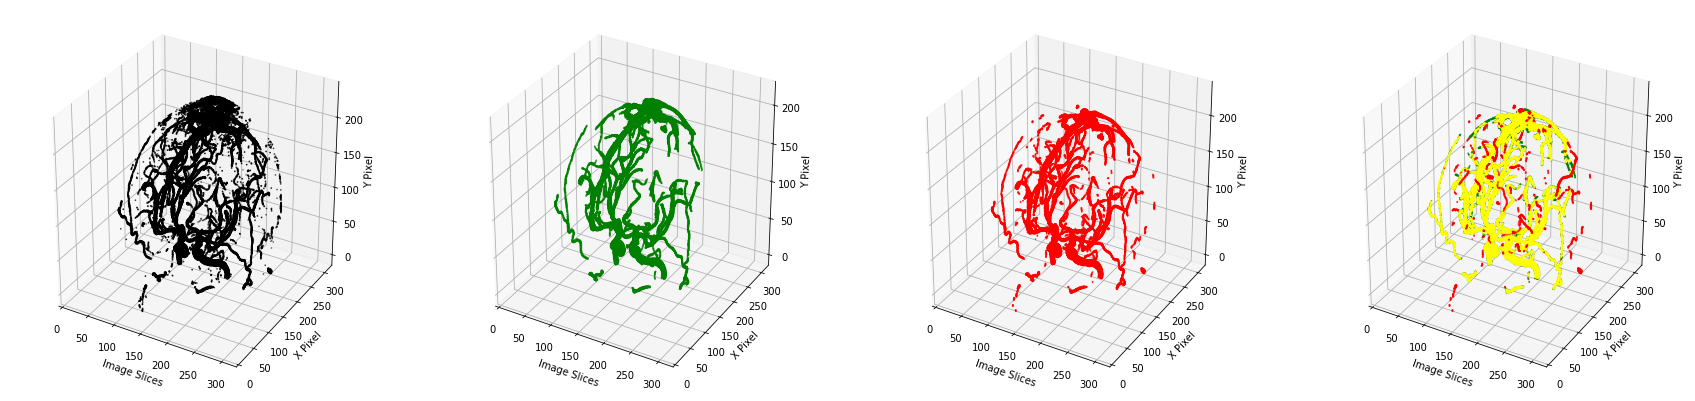

MRA Scan MNI_0664


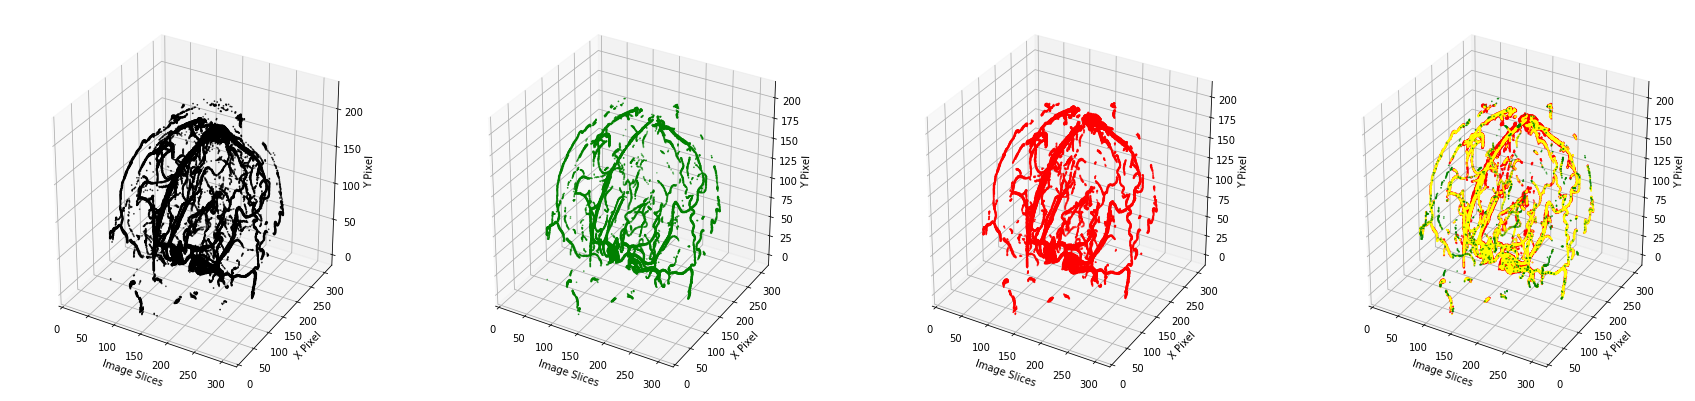

MRA Scan MNI_0590


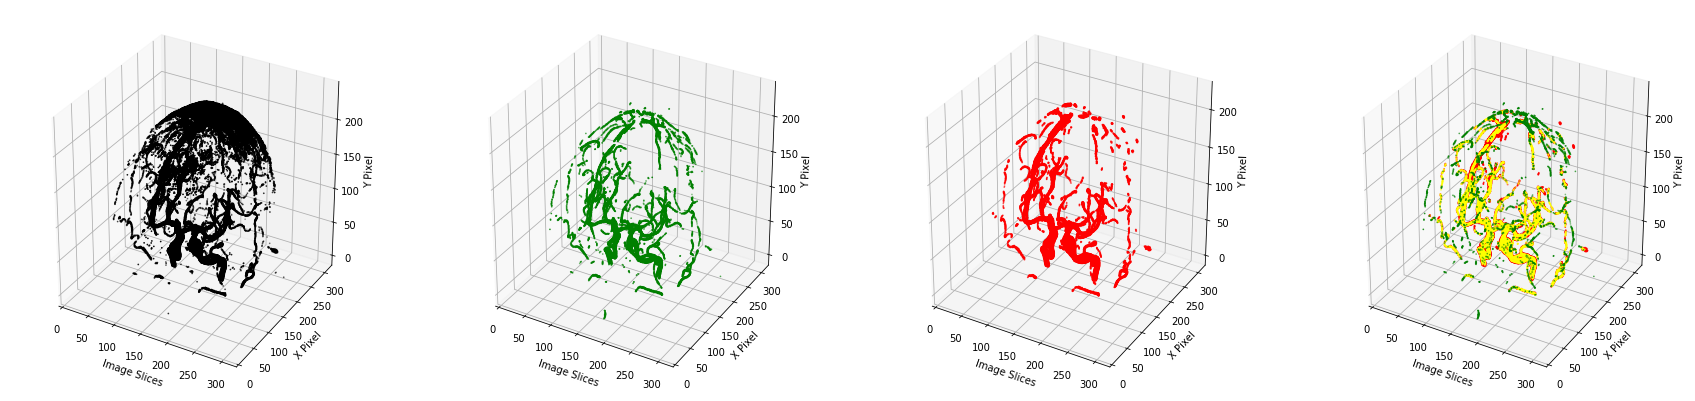

MRA Scan MNI_0591


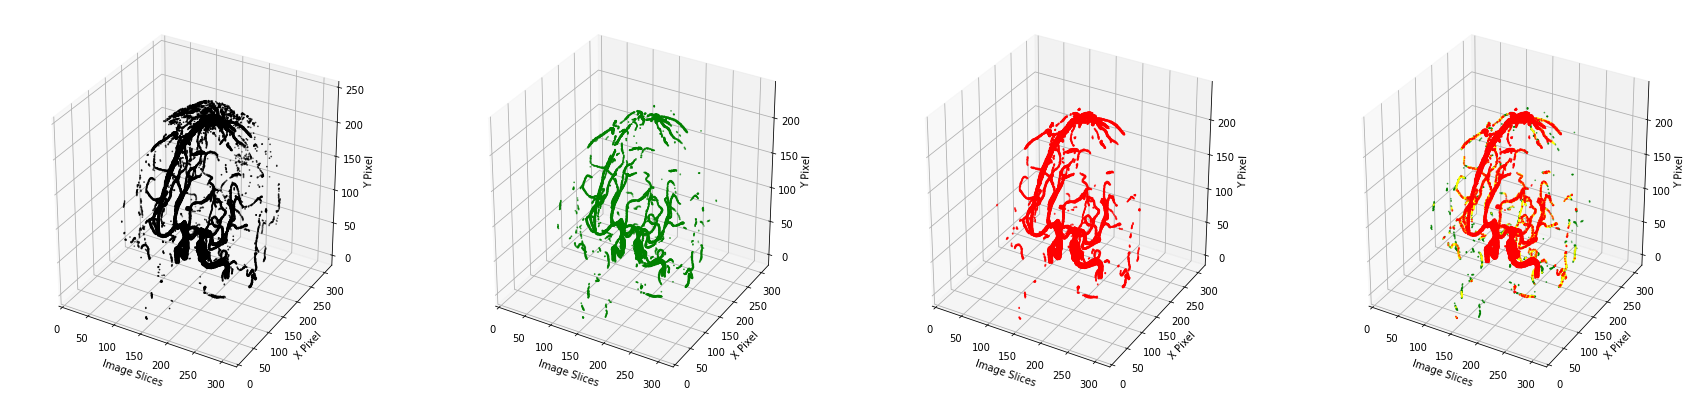

MRA Scan MNI_0640


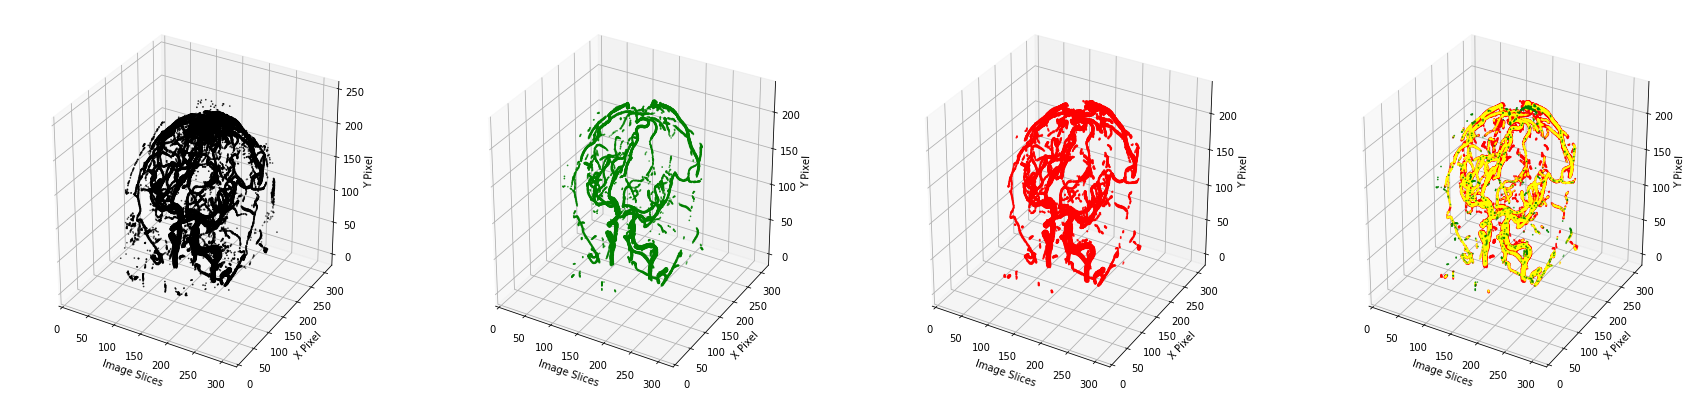

MRA Scan MNI_0648


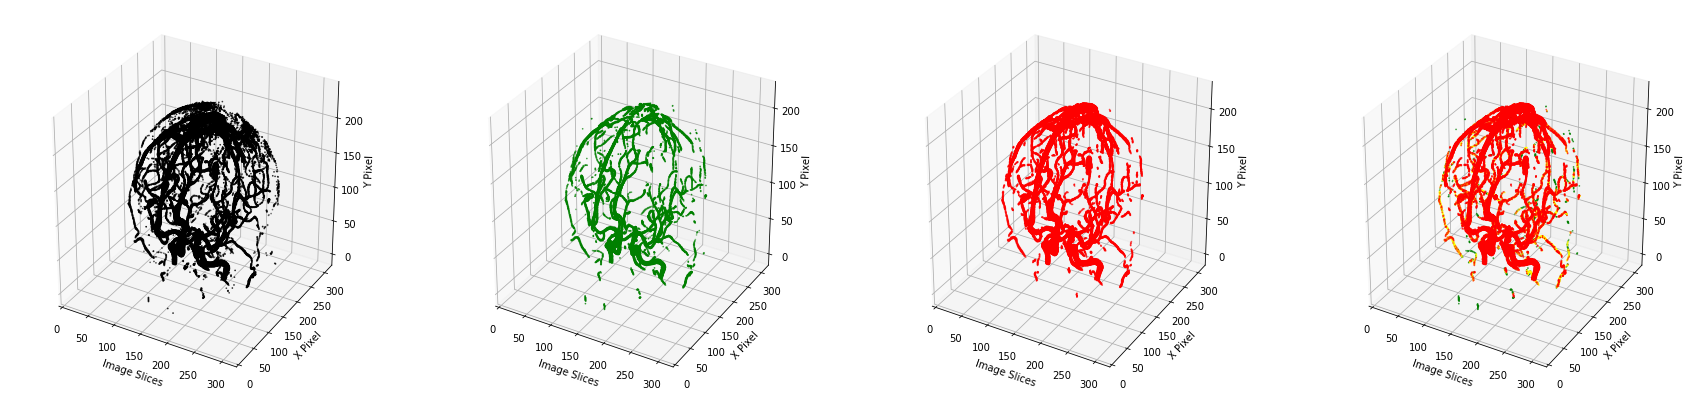

In [46]:

for idx in range(len(mra_all)):
    print('MRA Scan '+mra_all[idx])
    fig = plt.figure(figsize=(30,7))
    l_src = l_src_map[idx]
    l_seg = l_seg_map[idx]
    l_gt  = l_gt_map[idx]
    b_map = l_seg.astype(int)
    diff  = l_gt - (b_map *2)
    
    
     # 3D Source 
    ll = dict()
    i = np.equal(l_src, 1)
    ll[0] = np.where(i)
    ax = fig.add_subplot(1, 4, 1, projection='3d')
    display_3d_image (fig, ax, ll, ['black'])
    
    
    # 3D Ground Truth
    ll = dict()
    i = np.equal(l_gt, 1)
    ll[0] = np.where(i)
    ax = fig.add_subplot(1, 4, 2, projection='3d')
    display_3d_image (fig, ax, ll, ['green'])
    
    
    # 3D Prediction 
    b_map = l_seg.astype(int)
    ll = dict()
    i = np.equal(b_map, 1)
    ll[0] = np.where(i)
    ax = fig.add_subplot(1, 4, 3, projection='3d')
    display_3d_image (fig, ax, ll, ['red'])
    
    
    # 3D Ground Truth / Prediction Overlay 
    ll = dict()
    idx = np.equal(diff, 1) # missed blood vessels
    ll[0] = np.where(idx)
    idx = np.equal(diff, -2) # wrongly assigned blood vessels
    ll[1] = np.where(idx)
    idx = np.equal(diff, -1) # correctly assigned blood vessels
    ll[2] = np.where(idx)
    ax = fig.add_subplot(1, 4, 4, projection='3d')
    display_3d_image (fig, ax, ll, ['green','red','yellow'])
    
    # display the data for this record 
    plt.show()

End of the Test Phase (and the entire project!!!)